In [1]:
from inverse_modelling_tfo.models import train_model, create_perceptron_model
from inverse_modelling_tfo.data import generate_data_loaders
from torch.optim import Adam, SGD
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

# Normalization Function
Define how each field in the dataset is normalized before being loaded. For examples, check inverse_modelling_tfo/data/normalize

In [2]:
def custom_normalize(data: DataFrame):
    """
    Normalize everything by the max to be between 0 and 1.
    """
    data['SDD'] = 2 * (data['SDD'] / 20 - 0.5)
    # data['Intensity'] = data['Intensity'] / 1e8  # Number of Photons
    data['Intensity'] = np.log10(data['Intensity']) / 8  # Number of Photons
    data['Uterus Thickness'] = 2 * (data['Uterus Thickness'] / 8. - 0.5)
    data['Maternal Wall Thickness'] = 2 * (data['Maternal Wall Thickness'] / 40. - 0.5)
    data['Wave Int'] = 2 * (data['Wave Int'] - 1.0 - 0.5)
    data['Fetal Mu_a'] = 2 * (data['Fetal Mu_a']/0.1 - 0.5)
    data['Maternal Mu_a'] = 2 * (data['Maternal Mu_a']/0.01 - 0.5)
    return data

In [3]:
# Example Code
np.random.seed(70)  # Set seed for consistentcy
params = {
    'batch_size': 500, 'shuffle': False, 'num_workers': 2
}
train, val = generate_data_loaders(params, normalize_function=custom_normalize)
model = create_perceptron_model()
print(model)


Sequential(
  (0): Linear(in_features=6, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=1, bias=True)
  (7): Flatten(start_dim=1, end_dim=-1)
)


In [4]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)
# optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)


In [5]:
train_loss, validation_loss = train_model(model, optimizer, criterion, train, val, epochs=5)

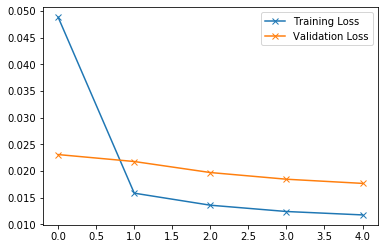

In [6]:
plt.figure()
plt.plot(train_loss, label='Training Loss', marker='x')
plt.plot(validation_loss, label='Validation Loss', marker='x')
plt.legend()